In [97]:
#Import required dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy import stats
from pathlib import Path
import hvplot.pandas
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import random

In [98]:
# Import API key
from api_keys import geoapify_key
#print(geoapify_key)

#setting graph color scheme
color = ['lightsteelblue','lightgrey','lightskyblue','royalblue',"lightcoral",]

Question 1: How has the Melbourne property market evolved over time based on the overall trends and patterns observed in the given dataset?

In [99]:

#read in CSV file
csv_file=Path("Resources/Property_Sales_Melbourne_City.csv")
mel_sales_df=pd.read_csv(csv_file)
mel_sales_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [100]:
# Configure the map plot
map_plot_1 = mel_sales_df.hvplot.points(
    "Longtitude",
    "Lattitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width =800,
    frame_height =700,
    color= "royalblue")

# Display the map
map_plot_1


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longtitude,Lattitude]

Needs to be updated with Enessa's New Code

In [101]:
#clean data frame
clean_sales= mel_sales_df.dropna()
cleaned_sales= clean_sales.drop(clean_sales.columns[0], axis=1)
cleaned_sales

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,Whittlesea,30 Sherwin St,3,h,601000,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
15389,Williamstown,75 Cecil St,3,h,1050000,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
15390,Williamstown,2/29 Dover Rd,1,u,385000,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
15392,Windsor,201/152 Peel St,2,u,560000,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [102]:
# Configure the map plot
map_plot_2 = cleaned_sales.hvplot.points(
    "Longtitude",
    "Lattitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width =800,
    frame_height =700,
    color= "royalblue")

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longtitude,Lattitude]

In [103]:
#Calculate the total sales for data frame
total_sales = cleaned_sales['Price'].sum()
print(f"Total Sales for all listed Melbourne Property across January 2016 to September 2017 is equal to ${total_sales:,.2f}")

print(f"-----------------------------------------------------------------------------------------------------------------------")
#Calculate the average sales
av_sales = cleaned_sales['Price'].mean()
print(f"Total average sales for all listed Melbourne Property across January 2016 to September 2017 is equal to ${av_sales:,.2f}")

Total Sales for all listed Melbourne Property across January 2016 to September 2017 is equal to $6,622,459,540.00
-----------------------------------------------------------------------------------------------------------------------
Total average sales for all listed Melbourne Property across January 2016 to September 2017 is equal to $1,068,828.20


Text(0.5, 1.0, 'Breakdown of the Count of Properties by Type')

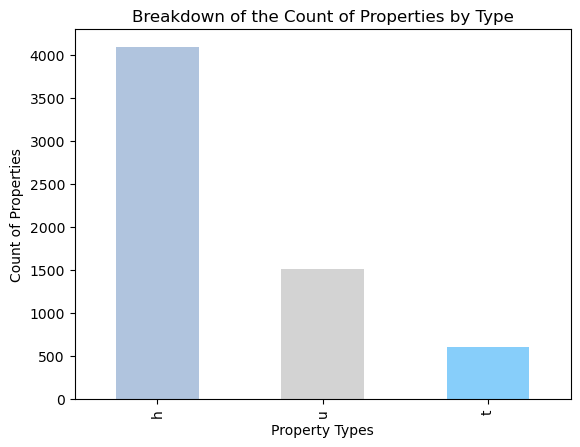

In [104]:
# see number of houses, units and townhouses
type_count=cleaned_sales['Type'].value_counts()
type_count.head()
type_count.plot.bar(x='type', color = color)
plt.xlabel("Property Types")
plt.ylabel("Count of Properties")
plt.title("Breakdown of the Count of Properties by Type")

Type
h    $1,273,016
t      $884,182
u      $588,375
Name: Price, dtype: object


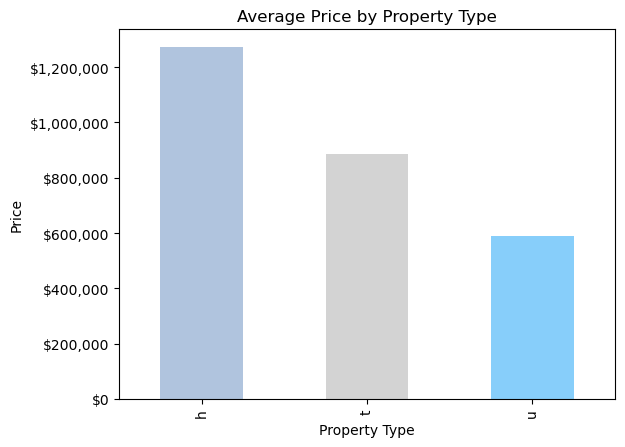

In [105]:
#Average sales by property type 
av_price_by_type = cleaned_sales.groupby('Type')['Price'].mean()
av_price_by_type = av_price_by_type.apply(lambda x: '${:,.0f}'.format(x))
print(av_price_by_type)

# group the dataframe by 'type' and calculate the mean 'Price' for each group
av_price_by_type = cleaned_sales.groupby('Type')['Price'].mean()


# create a bar chart
ax = av_price_by_type.plot.bar(color = color)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# add a title and axis labels
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')


# display the chart
plt.show()

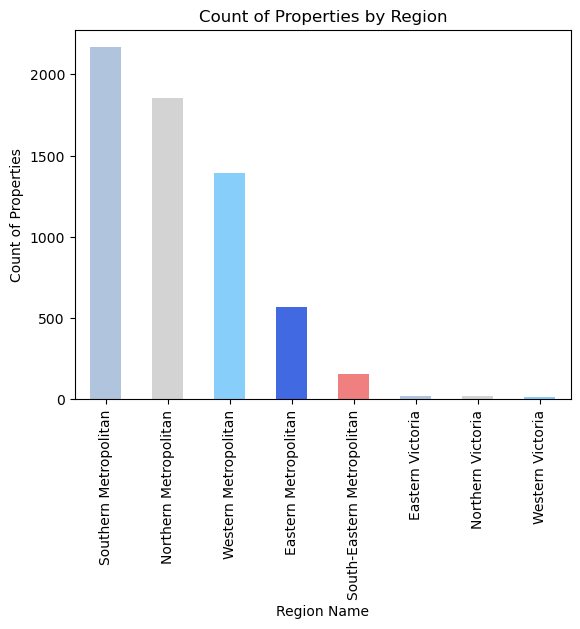

In [106]:
#sales by region 
region_sales = cleaned_sales['Regionname'].value_counts()
region_sales
x=['Regionname']
y= cleaned_sales['Regionname'].value_counts()
region_sales.plot.bar(x,y,color=color)
plt.xlabel("Region Name")
plt.ylabel("Count of Properties")
plt.title("Count of Properties by Region")
plt.show()

In [107]:
#Average Size by Property Type
av_size = cleaned_sales.groupby('Type')['Landsize'].mean()
av_size

Type
h    513.565802
t    259.611296
u    439.984064
Name: Landsize, dtype: float64

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_85330/3395720668.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_av_size_region['Average Price'] = df_av_size_region['Average Price'].str.replace('$','').str.replace(',','').astype(float)


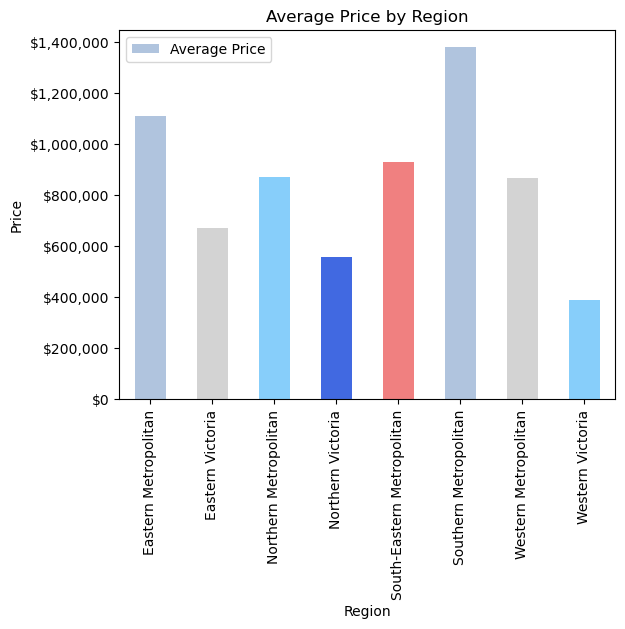

In [108]:
#Calcaulte average price by Region
av_size_region = cleaned_sales.groupby('Regionname')['Price'].mean()
av_size_region = av_size_region.apply(lambda x: '${:,.0f}'.format(x))
av_size_region

# convert the index and values of the series object to a dataframe
df_av_size_region = av_size_region.reset_index()

# rename the columns to 'Regionname' and 'Average Price'
df_av_size_region.columns = ['Regionname', 'Average Price']

# convert the 'Average Price' column to a float data type
df_av_size_region['Average Price'] = df_av_size_region['Average Price'].str.replace('$','').str.replace(',','').astype(float)

# create a bar chart
ax = df_av_size_region.plot.bar(x='Regionname', y='Average Price', color = color)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# add a title and axis labels
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Price')

# display the chart
plt.show()

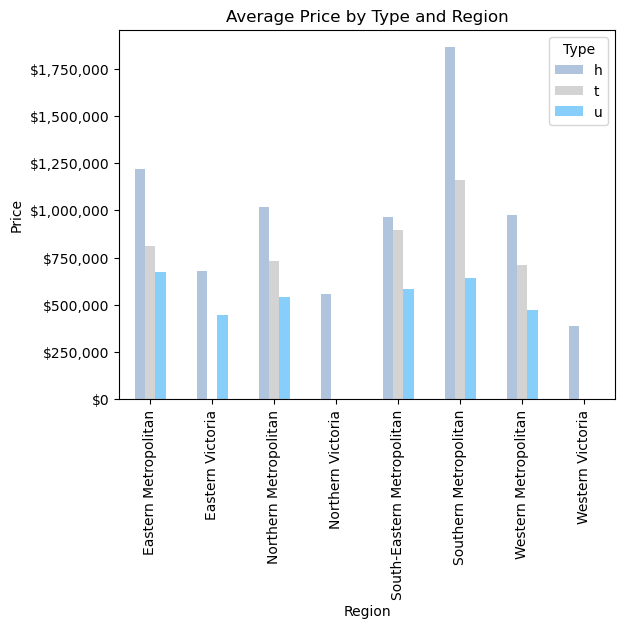

In [109]:
# use pivot_table() method to create a new dataframe with the average price of each property type for each region
df_av_price_by_type_region = cleaned_sales.pivot_table(index='Regionname', columns='Type', values='Price', aggfunc='mean')

# create a bar chart
ax = df_av_price_by_type_region.plot.bar(color = color)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# add a title and axis labels
plt.title('Average Price by Type and Region')
plt.xlabel('Region')
plt.ylabel('Price')

# display the chart
plt.show()

In [110]:
#Create a function that determines seasons function based on months function

# Define a function that maps each month to a season
def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    else:
        return 'Autumn'

In [111]:
#Get the date column converted, so we can get month and year separated
# Convert the Date column to a Pandas datetime format
property_database = mel_sales_df
property_database['Date'] = pd.to_datetime(property_database['Date'], format='%d/%m/%Y')
# Create a new column for Month_Year
property_database['Month_Year'] = property_database['Date'].dt.strftime('%b-%Y')
# Group the data by Month_Year and calculate the mean price and count of sales for each group
price_by_month_year = property_database.groupby('Month_Year').agg({'Price': 'mean', 'Date': 'count'}).reset_index()
# Rename the 'Date' column to 'Sales'
price_by_month_year = price_by_month_year.rename(columns={'Date': 'Count of Sales'})
# Add a new column for season based on the Month_Year column
price_by_month_year['Season'] = price_by_month_year['Month_Year'].apply(lambda x: get_season(x[:3]))
# Convert the Month_Year column to a Pandas datetime format
price_by_month_year['Month_Year'] = pd.to_datetime(price_by_month_year['Month_Year'], format='%b-%Y')
# Sort the DataFrame by Month_Year
price_by_month_year = price_by_month_year.sort_values('Month_Year').reset_index()
# Convert the Month_Year column back to a string
price_by_month_year['Month_Year'] = price_by_month_year['Month_Year'].dt.strftime('%b-%Y')
# Select only the Month_Year, Price, Sales, and Season columns
price_by_month_year = price_by_month_year[["Month_Year","Price", "Count of Sales", "Season"]]
# Display the resulting DataFrame
price_by_month_year.head()


,Month_Year,Price,Count of Sales,Season
0,Jan-2016,1.009000e+06,2,Winter
1,Feb-2016,9.008214e+05,35,Winter
2,Apr-2016,1.006784e+06,401,Spring
3,May-2016,1.047057e+06,1167,Spring
4,Jun-2016,1.038088e+06,962,Summer


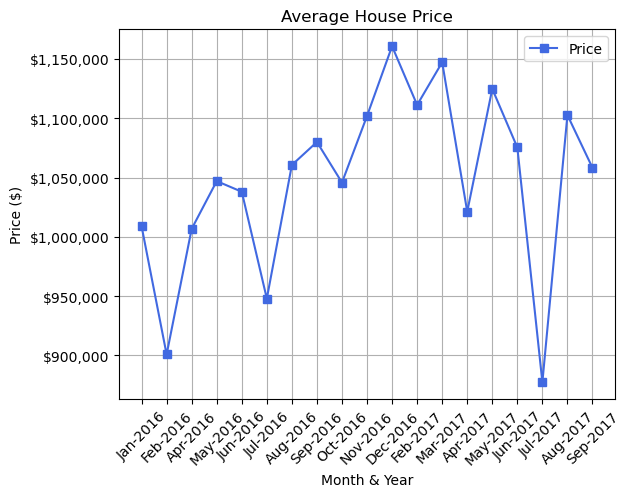

In [112]:
# Get the unique values in the "Month_Year" column
x_labels = price_by_month_year["Month_Year"].unique()

# Plot a line plot of the dataframe
ax = price_by_month_year.plot(kind="line", x="Month_Year", y="Price", marker="s", color="royalblue")

# Set the x-axis labels to be the unique values in the "Month_Year" column
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.ylabel("Price ($)")
plt.xlabel("Month & Year")
plt.title("Average House Price")
plt.grid()

# Save the figure
plt.savefig("Output Data/Graph Images/AverageHousePricevsPeriod")

# Display the plot
plt.show()

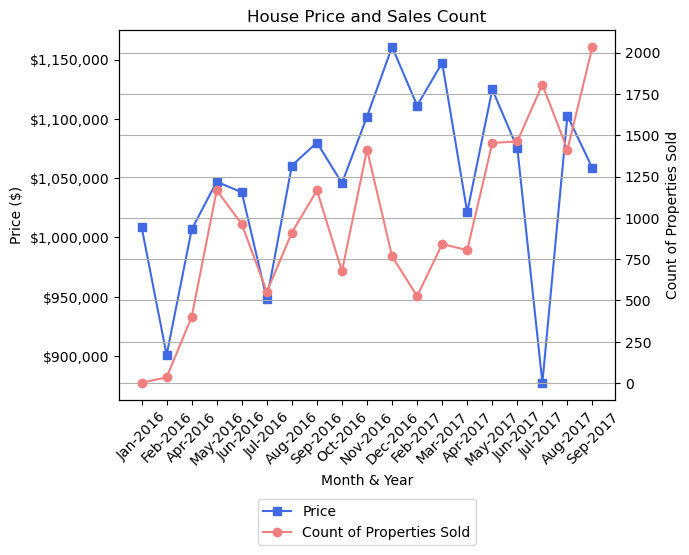

In [117]:
# Create a figure and axis objects
fig, ax1 = plt.subplots()

# Add a second axis
ax2 = ax1.twinx()

# Set x-axis label
ax1.set_xlabel("Month & Year")

# Set the x-axis labels to be the unique values in the "Month_Year" column
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45)

# Set y-axis labels
ax1.set_ylabel("Price ($)")
ax2.set_ylabel("Count of Properties Sold")

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Plot the data on each axis and add legends
p1 = ax1.plot(price_by_month_year["Month_Year"], price_by_month_year["Price"], color="royalblue",marker="s", label="Price")
p2 = ax2.plot(price_by_month_year["Month_Year"], price_by_month_year["Count of Sales"], color="lightcoral",marker="o", label="Count of Properties Sold")

# Combine the legends and place it below the graph title
lines = p1 + p2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25))

# Set the title
plt.title("House Price and Sales Count")

#Add features to the plot
plt.grid()

# Save the figure
plt.savefig("Output Data/Graph Images/AverageHousePricevsPeriod(IncludingCountofSales)")

# Show the plot
plt.show()

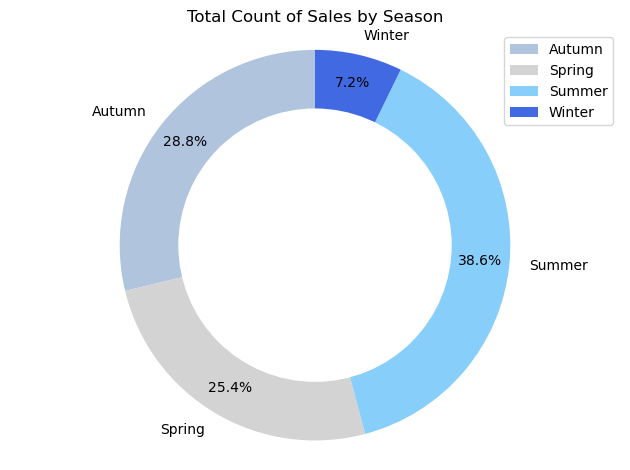

In [114]:
# Group the data by season and sum the sales for each group
sales_by_season = price_by_month_year.groupby('Season')['Count of Sales'].sum()

# Create a donut chart of the sales by season
plt.pie(sales_by_season, labels=sales_by_season.index, colors=color, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1, wedgeprops={'width': 0.5})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and legend to the chart
plt.title('Total Count of Sales by Season')
plt.legend(labels=sales_by_season.index, loc='upper right')

# Display the chart
plt.axis('equal')
plt.tight_layout()

# Save the figure
plt.savefig("Output Data/Graph Images/SalesbySeasons")

#Show the plot
plt.show()


In [115]:
# Load the CSV file for interest rate infomation into a Pandas DataFrame
csv_file = Path("Resources/Interest _Rate_Monthly_Avg.csv")
interest_rate_database = pd.read_csv(csv_file)

#Correct column headings 
interest_rate_df = interest_rate_database.rename(columns={'Date*': 'Date',"Owner Occupier Standard Variable Rate":"Avg_Standard_Rate"})

# Convert 'Date' column to pandas datetime object
interest_rate_df['Date'] = pd.to_datetime(interest_rate_df['Date'], format='%d-%b-%y')

# Extract Month_Year as separate column
interest_rate_df['Month_Year'] = interest_rate_df['Date'].dt.strftime('%b-%Y')

#Rearrange the columns
interest_rate_df = interest_rate_df[["Month_Year","Avg_Standard_Rate","RBA Cash Rate"]]

# Display resulting dataframe
interest_rate_df.head()

#Merge interest_rate_df to the price_by_month_year for regression analysis
price_interest_rate_df = price_by_month_year.merge(interest_rate_df, on='Month_Year')
price_interest_rate_df.head()

,Month_Year,Price,Count of Sales,Season,Avg_Standard_Rate,RBA Cash Rate
0,Jan-2016,1.009000e+06,2,Winter,5.46,2.00
1,Feb-2016,9.008214e+05,35,Winter,5.46,2.00
2,Apr-2016,1.006784e+06,401,Spring,5.46,2.00
3,May-2016,1.047057e+06,1167,Spring,5.39,1.75
4,Jun-2016,1.038088e+06,962,Summer,5.39,1.75


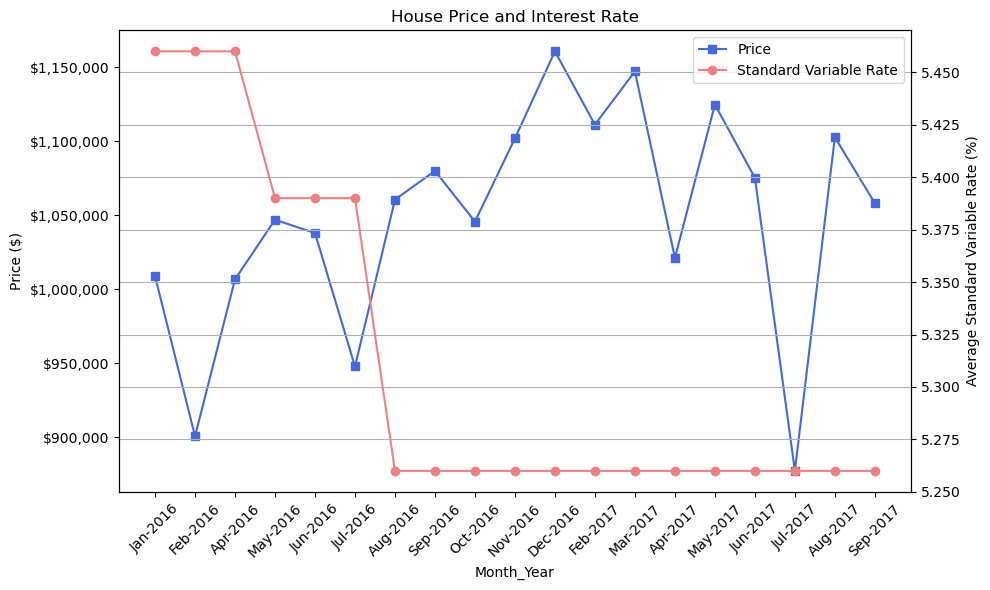

In [118]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))  # set the figure size

# Add a second axis
ax2 = ax1.twinx()

# Set x-axis label
ax1.set_xlabel("Month_Year")

# Set the x-axis labels to be the unique values in the "Month_Year" column
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45)

# Set y-axis labels
ax1.set_ylabel("Price ($)")
ax2.set_ylabel("Average Standard Variable Rate (%)")

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Plot the data on each axis and add legends
p1 = ax1.plot(price_interest_rate_df["Month_Year"], price_interest_rate_df["Price"], color="royalblue", marker="s", label="Price")
p2 = ax2.plot(price_interest_rate_df["Month_Year"], price_interest_rate_df["Avg_Standard_Rate"], color="lightcoral", marker="o", label="Standard Variable Rate")

# Combine the legends and place it below the graph title
lines = p1 + p2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

# Set the title
plt.title("House Price and Interest Rate")

# Add features to the plot
plt.grid()

# Save the figure with tight layout
plt.tight_layout()  # adjust the plot layout
plt.savefig("Output Data/Graph Images/PriceVsPeriod&InterestRate", dpi=300)  # set the resolution
plt.show()


Question 2: Location, Location, Location: Analysing the Impact of Suburb, Region, and Distance to CBD on Melbourne Property Prices.

Question 3:Price vs Charaterics: Investigating the Relationship Between Property Size and Sale Price in the Melbourne Real Estate Market.

Question 4: Age is Just a Number: Analysing the Effect of Building Age on Property Prices in Melbourne, seeing if there is a correlation to price across all suburbs.

Question 5:Unique Factors: An Analysis of the impact of proximity to Public Transport, Shopping, Healthcare, Cultural Attractions and Open Parklands has on House Prices in a 10km to 20km radius of Melbourne.

In [119]:
# Start Work for API Call Section
api_call_add_range_df = property_database[["Suburb", "Address", "Price", "Lattitude", "Longtitude", "Type", "Distance","CouncilArea"]]

# Set distance as int64 value and then filter for less than 20kms bu greater than 10km
api_call_add_range_df["Distance"] = api_call_add_range_df["Distance"].astype("float")
api_call_add_range_df = api_call_add_range_df.loc[(api_call_add_range_df["Distance"] > 10) & (api_call_add_range_df["Distance"] < 20)]

# Set type as h value
api_call_add_range_df = api_call_add_range_df.loc[(api_call_add_range_df["Type"] == "h")]

# Drop any NA values in the dataframe
api_call_add_range_df = api_call_add_range_df.dropna()

# Show dataframe
api_call_add_range_df

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_85330/2311636819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_call_add_range_df["Distance"] = api_call_add_range_df["Distance"].astype("float")


,Suburb,Address,Price,Lattitude,Longtitude,Type,Distance,CouncilArea
53,Airport West,50 Bedford St,730000,-37.72030,144.87550,h,13.5,Moonee Valley
54,Airport West,50 Bedford St,770000,-37.72030,144.87550,h,13.5,Moonee Valley
55,Airport West,23 Hart St,603000,-37.72940,144.88800,h,13.5,Moonee Valley
57,Airport West,1/37 Hillside Gr,600000,-37.72730,144.87440,h,13.5,Moonee Valley
64,Airport West,54 Marshall Rd,720000,-37.71730,144.88720,h,13.5,Moonee Valley
...,...,...,...,...,...,...,...,...
15381,Werribee,46 Coventry Dr,482500,-37.89337,144.64003,h,14.7,Wyndham
15383,Werribee,40 Tarneit Rd,597000,-37.89402,144.66276,h,14.7,Wyndham
15385,Westmeadows,43 Bamford Av,821000,-37.67841,144.87924,h,16.5,Hume
15386,Westmeadows,4 Pershore Ct,635000,-37.68026,144.88468,h,16.5,Hume


In [ ]:
# Search for proximity to public_transport.train
# Set parameters to search for nearby locations
radius = 2000
categories = ["public_transport.train"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_transport_new.csv")

In [ ]:
# Search for proximity to commercial.shopping_mall
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_transport_new.csv")

# Set parameters to search for nearby locations
radius = 2000
categories = ["commercial.shopping_mall"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_shopping_new.csv")

In [ ]:
# Search for proximity to healthcare
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_shopping_new.csv")

# Set parameters to search for nearby locations
radius = 2000
categories = ["healthcare"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_healthcare_new.csv")

In [ ]:
# Search for proximity to tourism.attraction
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_healthcare_new.csv")
# Drop unwanted columns
api_call_add_range_df = api_call_add_range_df.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"])

# Show the first few rows of the DataFrame
api_call_add_range_df.head()

# Set parameters to search for nearby locations
radius = 2000
categories = ["tourism.attraction"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_tourism_attraction_new.csv")

In [ ]:
# Search for proximity to leisure.park.nature_reserve
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_tourism_attraction_new.csv")

# Drop unwanted columns
api_call_add_range_df = api_call_add_range_df.drop(columns=["Unnamed: 0"])
api_call_add_range_df.head()

# Show the first few rows of the DataFrame
api_call_add_range_df.head()

# Set parameters to search for nearby locations
radius = 2000
categories = ["leisure.park.nature_reserve"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_park_new.csv")

In [121]:
# Read saved data
unique_indicators_add_range_df = pd.read_csv("Output Data/api_call_park_new.csv")

# Drop unwanted columns
unique_indicators_add_range_df = unique_indicators_add_range_df.drop(columns=["Unnamed: 0"])
unique_indicators_add_range_df.head()

# replace 'Yes' with 1
unique_indicators_add_range_df['public_transport.train Name'] = unique_indicators_add_range_df['public_transport.train Name'].replace({'Yes': 1})
unique_indicators_add_range_df['public_transport.train Name'] = unique_indicators_add_range_df['public_transport.train Name'].replace({"Not found": 0})

unique_indicators_add_range_df['commercial.shopping_mall Name'] = unique_indicators_add_range_df['commercial.shopping_mall Name'].replace({'Yes': 1})
unique_indicators_add_range_df['commercial.shopping_mall Name'] = unique_indicators_add_range_df['commercial.shopping_mall Name'].replace({"Not found": 0})

unique_indicators_add_range_df['healthcare Name'] = unique_indicators_add_range_df['healthcare Name'].replace({'Yes': 1})
unique_indicators_add_range_df['healthcare Name'] = unique_indicators_add_range_df['healthcare Name'].replace({"Not found": 0})

unique_indicators_add_range_df['tourism.attraction Name'] = unique_indicators_add_range_df['tourism.attraction Name'].replace({'Yes': 1})
unique_indicators_add_range_df['tourism.attraction Name'] = unique_indicators_add_range_df['tourism.attraction Name'].replace({"Not found": 0})

unique_indicators_add_range_df['leisure.park.nature_reserve Name'] = unique_indicators_add_range_df['leisure.park.nature_reserve Name'].replace({'Yes': 1})
unique_indicators_add_range_df['leisure.park.nature_reserve Name'] = unique_indicators_add_range_df['leisure.park.nature_reserve Name'].replace({"Not found": 0})

#Rename Columns
unique_indicators_add_range_df = unique_indicators_add_range_df.rename(columns={"public_transport.train Name": "Public Transport", "commercial.shopping_mall Name" : "Shopping Mall", "healthcare Name":"Healthcare", "tourism.attraction Name" : "Tourism Attraction", "leisure.park.nature_reserve Name" :"Park"})

#Calculate the Number of Stars
unique_indicators_add_range_df["Star Rating"] = unique_indicators_add_range_df[["Public Transport", "Shopping Mall", "Healthcare", "Tourism Attraction", "Park"]].sum(axis=1)
unique_indicators_add_range_df.head()

,Suburb,Address,Price,Lattitude,Longtitude,Type,Distance,CouncilArea,Public Transport,Shopping Mall,Healthcare,Tourism Attraction,Park,Star Rating
0,Airport West,50 Bedford St,730000,-37.7203,144.8755,h,13.5,Moonee Valley,0,1,1,1,1,4
1,Airport West,50 Bedford St,770000,-37.7203,144.8755,h,13.5,Moonee Valley,0,1,1,1,1,4
2,Airport West,23 Hart St,603000,-37.7294,144.8880,h,13.5,Moonee Valley,0,1,1,1,1,4
3,Airport West,1/37 Hillside Gr,600000,-37.7273,144.8744,h,13.5,Moonee Valley,0,1,1,1,1,4
4,Airport West,54 Marshall Rd,720000,-37.7173,144.8872,h,13.5,Moonee Valley,0,1,1,0,1,3


In [136]:
# Groupby each factor Public Transport", "Shopping Mall", "Healthcare", "Tourism Attraction", "Park"
mean_price_by_publictransport2 = unique_indicators_add_range_df.groupby("Public Transport")["Price"].mean()
print(mean_price_by_publictransport2)

mean_price_by_shoppingmall2 = unique_indicators_add_range_df.groupby("Shopping Mall")["Price"].mean()
print(mean_price_by_shoppingmall2)

mean_price_by_healthcare2 = unique_indicators_add_range_df.groupby("Healthcare")["Price"].mean()
print(mean_price_by_healthcare2)

mean_price_by_attraction2 = unique_indicators_add_range_df.groupby("Tourism Attraction")["Price"].mean()
print(mean_price_by_attraction2)

mean_price_by_park2 = unique_indicators_add_range_df.groupby("Park")["Price"].mean()
print(mean_price_by_park2)

# Create a DataFrame with the mean prices for each factor
star_rating_df2 = pd.DataFrame({
    "Public Transport": mean_price_by_publictransport2,
    "Shopping Mall": mean_price_by_shoppingmall2,
    "Healthcare": mean_price_by_healthcare2,
    "Tourism Attraction": mean_price_by_attraction2,
    "Park": mean_price_by_park2
})

# Print the DataFrame
star_rating_df2

# Transpose the DataFrame
star_rating_df2_transpose = star_rating_df2.transpose()

# Print the transposed DataFrame
print(star_rating_df2_transpose)


Public Transport
0    1.003434e+06
1    1.143582e+06
Name: Price, dtype: float64
Shopping Mall
0    1.203274e+06
1    1.071384e+06
Name: Price, dtype: float64
Healthcare
0    6.690603e+05
1    1.112341e+06
Name: Price, dtype: float64
Tourism Attraction
0    1.011395e+06
1    1.139717e+06
Name: Price, dtype: float64
Park
0    1.200186e+06
1    9.689882e+05
Name: Price, dtype: float64
                               0             1
Public Transport    1.003434e+06  1.143582e+06
Shopping Mall       1.203274e+06  1.071384e+06
Healthcare          6.690603e+05  1.112341e+06
Tourism Attraction  1.011395e+06  1.139717e+06
Park                1.200186e+06  9.689882e+05


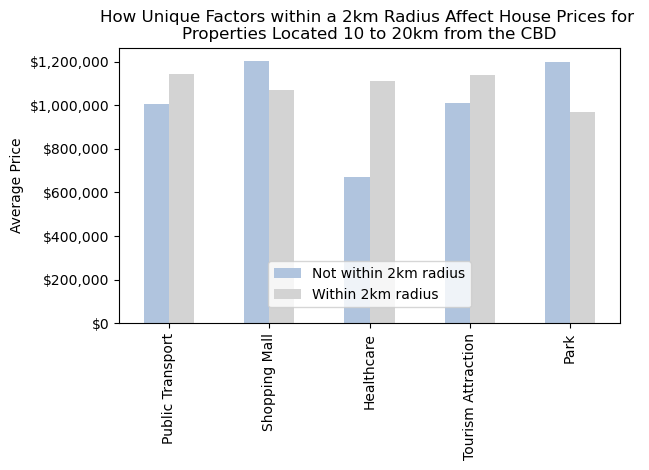

In [158]:
star_rating_df2_transpose = star_rating_df2_transpose.astype("float")
ax = star_rating_df2_transpose.plot(kind="bar", color=color)

# Set the x-axis tick labels to the index of the dataframe
ax.set_xticklabels(star_rating_df2_transpose.index)

ax.set_ylabel("Average Price")
ax.set_title("How Unique Factors within a 2km Radius Affect House Prices for \nProperties Located 10 to 20km from the CBD")  # add newline character

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Set the legend to the column names of the dataframe, with new labels
legend_labels = {0: "Not within 2km radius", 1: "Within 2km radius"}
ax.legend(star_rating_df2_transpose.columns.map(legend_labels), bbox_to_anchor=(0.5, 0.25), loc='upper center')

plt.xticks(rotation=90)

# Save the figure
plt.tight_layout()
plt.savefig("Output Data/Graph Images/AvgPricePerUniqueFactorWithin2kmRadius-10KM_to_20km_Data")

#Show the plot
plt.show()

